# Methodological note for droughts

In this notebook we display some relevant results and explain the methodology we designed to define droughts differently for Agriculture and Manufacturing sectors, and distinguishing between the intensity of the drought.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
import zipfile

In [2]:
import xarray as xr
import rioxarray as rxr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import earthpy as et
import regionmask
import contextily as cx
import importlib

In [3]:
from utils.constants import *
from utils.countries import *
from utils.functions import *

In [4]:
os.chdir(ABSOLUTE_FOLDER_REPOSITORY)

In [5]:
nuts = load_nuts_mask(level=3, subset=[*EU, "UK"])

## Data preparation

In [6]:
df = pd.read_csv(os.path.join(FOLDER_PROCESSED_DATA, "final_dataset.csv"))
df = pd.merge(nuts, df, how="left", on=["NUTS_ID"])
df["gva_A_gr"] = df["gross_value_added_A"] / df["gva_A_lagged"] - 1
df["gva_C_gr"] = df["gross_value_added_C"] / df["gva_C_lagged"] - 1

## Drought for Agriculture sector

Source: EDO Combined drought indicator, we look at SPI03, SMA, FAPAR


FAPAR was estimated backward looking since the data was only available since 2012, however performance was not promising
For simplicity, only SPI03 and SMA was considered to construct two versions of the drought indicator:

- Weak drought indicator (agriculture): `-2 <= spi03 < -1` and `sma <= -1`
- Strong drought indicator (agriculture): `spi03 <= -2` and `sma <= -1`

For the agricultural sector short-term precipitation as well as soil moisture are relevant (meteorological drought is considered too weak, hydrological drought is according to research encompassing the agricultural drought).

## Droughts for Manufacturing sector

Source: lack of relevant literature, reasoning based on the agricultural indicators including relevant data patterns and expert judgement

The idea is to come close to modelling a hydrological drought, i.e. considering the LFI and the SPI12, the challenge for the manufacturing sector are supply chains and transportation, energy provision, raw input materials, water for cooling, and production processes. Considerations were also covering FAPAR (e.g. for biomass provision) but not included in the indicator. 

We chose SPI06 and LFI to model two versions of the drought indicator: 
- Weak drought indicator manufacturing: `-2 <= spi06 < -1` and `lfi >= 0.25`
- Strong drought indicator manufacturing: `spi06 <= -2` and `lfi >= 0.25`

## Visualization of climate data

In [9]:
#########################################################################
variable = "spi03_mean"  # input name of variable as string
year = 2007  # input year as integer
#########################################################################

# If data are not available the codes produces an error or values in the range [-.1, .1]

plot_map(
    df=df[df.YEAR == year],
    variable=variable,
    cmap="BrBG",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{str(year)}",
    output_file_name=f"{variable}_{str(year)}",
)

In [10]:
#########################################################################
variable = "spi12_mean"  # input name of variable as string
year = 2007  # input year as integer
#########################################################################

# If data are not available the codes produces an error or values in the range [-.1, .1]

plot_map(
    df=df[df.YEAR == year],
    variable=variable,
    cmap="BrBG",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{str(year)}",
    output_file_name=f"{variable}_{str(year)}",
)

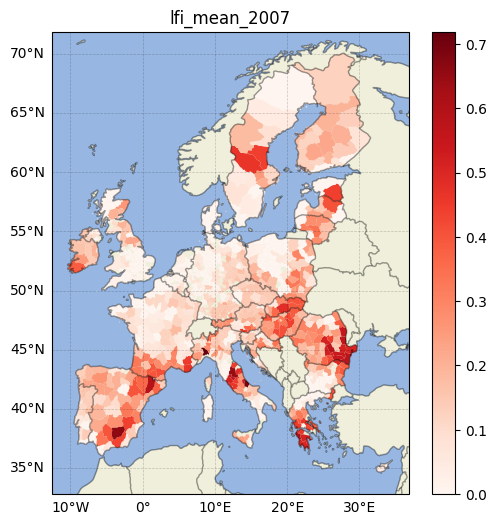

In [14]:
#########################################################################
variable = "lfi_mean"  # input name of variable as string
year = 2007  # input year as integer
#########################################################################

# If data are not available the codes produces an error or values in the range [-.1, .1]

plot_map(
    df=df[df.YEAR == year],
    variable=variable,
    cmap="Reds",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{str(year)}",
    output_file_name=f"{variable}_{str(year)}",
)

In [16]:
#########################################################################
variable = "sma_mean"  # input name of variable as string
year = 2007  # input year as integer
#########################################################################

# If data are not available the codes produces an error or values in the range [-.1, .1]

plot_map(
    df=df[df.YEAR == year],
    variable=variable,
    cmap="BrBG",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{str(year)}",
    output_file_name=f"{variable}_{str(year)}",
)

## Case study for Romania (2007)

In Romania, 2007 was notably warm and dry. We therefore show a mini case study trying to understand the interactions between the climate data, indicators and the GVA rate. 

We see that mostly the eastern region is affected by the weather conditions. Our indicators count show a high frequency in 2007. Further our economic variable shows a low growth rate.

Source: https://nhess.copernicus.org/articles/12/3519/2012/nhess-12-3519-2012.pdf

In [17]:
#########################################################################
variable = "spi03_mean"  # input name of variable as string
country = "RO"
year = 2007  # input year as integer
#########################################################################

df_chart = df[(df.CNTR_CODE == country) & (df.YEAR == year)].copy()

plot_map(
    df=df_chart,
    variable=variable,
    cmap="BrBG",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{country}_{str(year)}",
    output_file_name=f"{variable}_{country}_{str(year)}",
)

In [18]:
#########################################################################
variable = "sma_mean"  # input name of variable as string
country = "RO"
year = 2007  # input year as integer
#########################################################################

df_chart = df[(df.CNTR_CODE == country) & (df.YEAR == year)].copy()

plot_map(
    df=df_chart,
    variable=variable,
    cmap="BrBG",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{country}_{str(year)}",
    output_file_name=f"{variable}_{country}_{str(year)}",
)

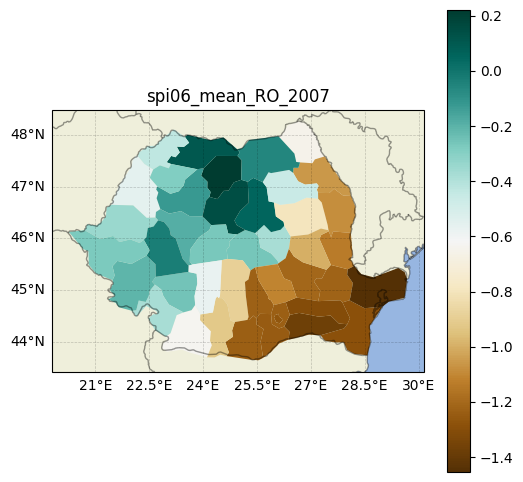

In [19]:
#########################################################################
variable = "spi06_mean"  # input name of variable as string
country = "RO"
year = 2007  # input year as integer
#########################################################################

df_chart = df[(df.CNTR_CODE == country) & (df.YEAR == year)].copy()

plot_map(
    df=df_chart,
    variable=variable,
    cmap="BrBG",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{country}_{str(year)}",
    output_file_name=f"{variable}_{country}_{str(year)}",
)

In [20]:
#########################################################################
variable = "lfi_mean"  # input name of variable as string
country = "RO"
year = 2007  # input year as integer
#########################################################################

df_chart = df[(df.CNTR_CODE == country) & (df.YEAR == year)].copy()

plot_map(
    df=df_chart,
    variable=variable,
    cmap="Reds",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{country}_{str(year)}",
    output_file_name=f"{variable}_{country}_{str(year)}",
)

In [21]:
#########################################################################
variable = "drg_agr_w"  # input name of variable as string
country = "RO"
year = 2007  # input year as integer
#########################################################################

df_chart = df[(df.CNTR_CODE == country) & (df.YEAR == year)].copy()

plot_map(
    df=df_chart,
    variable=variable,
    cmap="Reds",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{country}_{str(year)}",
    output_file_name=f"{variable}_{country}_{str(year)}",
)

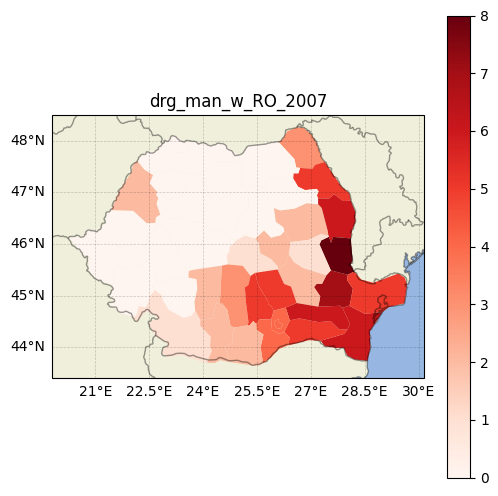

In [22]:
#########################################################################
variable = "drg_man_w"  # input name of variable as string
country = "RO"
year = 2007  # input year as integer
#########################################################################

df_chart = df[(df.CNTR_CODE == country) & (df.YEAR == year)].copy()

plot_map(
    df=df_chart,
    variable=variable,
    cmap="Reds",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{country}_{str(year)}",
    output_file_name=f"{variable}_{country}_{str(year)}",
)

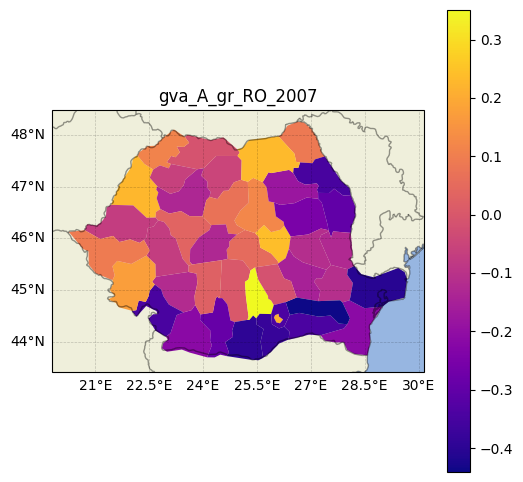

In [23]:
variable = "gva_A_gr"  # input name of variable as string
country = "RO"
year = 2007  # input year as integer
#########################################################################

df_chart = df[(df.CNTR_CODE == country) & (df.YEAR == year)].copy()

plot_map(
    df=df_chart,
    variable=variable,
    cmap="plasma",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{country}_{str(year)}",
    output_file_name=f"{variable}_{country}_{str(year)}",
)

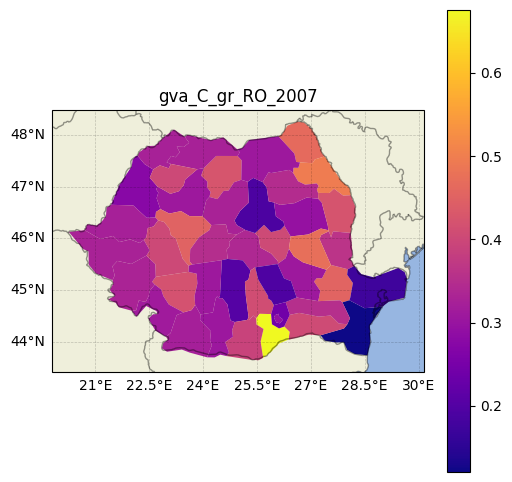

In [24]:
variable = "gva_C_gr"  # input name of variable as string
country = "RO"
year = 2007  # input year as integer
#########################################################################

df_chart = df[(df.CNTR_CODE == country) & (df.YEAR == year)].copy()

plot_map(
    df=df_chart,
    variable=variable,
    cmap="plasma",  #'BrBG', 'Reds'
    save=False,
    title=f"{variable}_{country}_{str(year)}",
    output_file_name=f"{variable}_{country}_{str(year)}",
)